In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
import sklearn
import os
%matplotlib inline
from tensorflow.keras import Sequential
import tensorflow as tf
import tensorflow.keras.layers
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Dropout
import tensorflow.keras.losses

In [47]:
df = pd.read_csv("dataset.csv")

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (5,8,9,10,11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [48]:
# df = df[df['severity'].isin(["medium", "small", "large", "very_large", "na"])]
df['severity'].value_counts()
df = shuffle(df)
df.reset_index(inplace=True, drop=True)

In [49]:
def convert(field, func):
	global df
	df[field] = df[field].apply(func)

In [50]:
df = df.query("(landslide == 0) | (landslide == 1 & (severity == 'medium' | severity == 'small' | severity == 'large' | severity=='very_large'))")
df

,Unnamed: 0,id,date,lat,lon,country,fatalities,injuries,type,trigger,...,ARI7,ARI6,ARI5,ARI4,ARI3,ARI2,ARI1,ARI0,slope,osm
0,10388,12912,6/16/16,27.9869,84.2765,Nepal,0.0,0.0,landslide,unknown,...,0.446392,0.333051,3.297807,2.534060,2.782960,4.846926,4.815700,3.017444,25.799,807
1,19228,117000,10/30/16,-41.6221,-11.8149,NaN,NaN,NaN,NaN,NaN,...,0.278180,0.917440,0.769048,0.701611,0.234479,0.122645,4.506666,5.456891,0.000,392
2,14557,19494,1/17/09,28.4979,18.6655,NaN,NaN,NaN,NaN,NaN,...,0.214976,0.095545,0.186037,0.067469,0.038585,0.025817,0.005292,0.003675,2.305,4178
3,11628,15716,4/18/16,-26.0909,112.1909,NaN,NaN,NaN,NaN,NaN,...,1.653661,0.744148,0.266423,0.140102,0.086817,0.059164,0.042935,0.006750,0.000,2160
4,8380,3758,6/5/13,27.4513,87.6093,Nepal,9.0,0.0,mudslide,downpour,...,0.425049,3.223316,2.459398,3.920892,1.559398,0.737239,0.539303,0.295777,36.799,25559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17803,15681,13688,8/12/18,41.1119,-74.2254,NaN,NaN,NaN,NaN,NaN,...,1.351464,0.913656,2.605226,0.795861,0.381190,1.795443,2.750458,4.708659,8.219,434
17804,13201,20092,5/10/12,19.7524,103.0095,NaN,NaN,NaN,NaN,NaN,...,0.060451,0.025527,0.407516,0.567757,0.759222,2.275621,2.541843,1.303324,25.454,8
17805,14747,115113,9/18/12,52.1417,-72.8443,NaN,NaN,NaN,NaN,NaN,...,0.448215,0.972103,0.307620,0.155427,0.084682,0.034992,0.683026,3.950563,2.341,3635
17806,3332,10061,9/22/15,8.9496,-79.6336,Panama,0.0,0.0,landslide,downpour,...,3.498859,4.313576,3.484781,2.567836,3.439251,1.240762,4.963043,3.946455,2.539,31501


In [51]:
X = df.copy()
y = []
types = set()
for idx, row in X.iterrows():
    if row.landslide == 0:
        y.append(0)
    elif row.severity == 'small':
        y.append(1)
    elif row.severity == 'medium':
        y.append(2)
    else:
        y.append(3)
    types.add(y[-1])
print(types)
columns=[]
for i in range(9, 2, -1):
    columns.append('humidity' + str(i))
    columns.append('ARI' + str(i))
    columns.append('wind' + str(i))
# columns.append('slope')
# columns.append('forest2')
# columns.append('osm')
X = X[columns]
X

{0, 1, 2, 3}


,humidity9,ARI9,wind9,humidity8,ARI8,wind8,humidity7,ARI7,wind7,humidity6,...,wind6,humidity5,ARI5,wind5,humidity4,ARI4,wind4,humidity3,ARI3,wind3
0,82,2.516330,12,78,0.904565,12,69,0.446392,11,52,...,13,70,3.297807,8,76,2.534060,9,80,2.782960,11
1,65,0.352799,31,81,0.323531,24,83,0.278180,29,82,...,60,61,0.769048,43,79,0.701611,46,84,0.234479,37
2,52,0.000000,22,73,0.859904,26,67,0.214976,16,97,...,23,60,0.186037,27,58,0.067469,36,67,0.038585,17
3,82,0.000000,17,80,0.000000,23,84,1.653661,32,79,...,32,69,0.266423,29,72,0.140102,28,71,0.086817,30
4,71,1.203729,18,76,0.435239,17,76,0.425049,14,74,...,10,89,2.459398,16,91,3.920892,13,84,1.559398,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17803,92,2.498238,13,91,3.072943,10,85,1.351464,8,81,...,8,89,2.605226,13,86,0.795861,10,88,0.381190,15
17804,79,0.311164,9,73,0.125559,10,69,0.060451,9,73,...,5,83,0.407516,5,91,0.567757,9,98,0.759222,8
17805,96,2.068271,25,97,0.863348,28,97,0.448215,12,95,...,31,86,0.307620,28,76,0.155427,11,81,0.084682,17
17806,92,6.520882,8,93,4.173564,12,95,3.498859,13,91,...,11,91,3.484781,11,90,2.567836,9,91,3.439251,8


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# scaler = StandardScaler()
# scaler.fit(X_train)

# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)
X_train = np.array(X_train)
X_test = np.array(X_test)
X_train[0]

array([93.        ,  2.24699472, 24.        , 88.        ,  1.62753327,
       19.        , 89.        ,  0.98786865, 18.        , 88.        ,
        0.4064999 , 12.        , 81.        ,  1.22033666, 17.        ,
       80.        ,  0.58040655, 10.        , 64.        ,  0.23655079,
       12.        ])

In [53]:
y_train = np.array(y_train)
y_test = np.array(y_test)
# len(X_train) # of batches
# 5 timesteps (days 7 - 3)
# 2 features per timestep
X_train=X_train.reshape((len(X_train), 7, 3))
X_test=X_test.reshape((len(X_test), 7, 3))
print(X_train.shape)
X_train[0]

(13191, 7, 3)


array([[93.        ,  2.24699472, 24.        ],
       [88.        ,  1.62753327, 19.        ],
       [89.        ,  0.98786865, 18.        ],
       [88.        ,  0.4064999 , 12.        ],
       [81.        ,  1.22033666, 17.        ],
       [80.        ,  0.58040655, 10.        ],
       [64.        ,  0.23655079, 12.        ]])

In [ ]:
original = Sequential()
original.add(Bidirectional(LSTM(11)))
# original.add(Dropout(0.1))
original.add(Dense(1))
original.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])
original.fit(X_train, y_train, epochs = 15, batch_size = 20, verbose = 2)
# res = LSTM(11)
# out = res(X_train)
# print(out.shape)

Epoch 1/15
660/660 - 3s - loss: -9.4464e-01 - accuracy: 0.2185
Epoch 2/15
660/660 - 2s - loss: -1.3787e+00 - accuracy: 0.2489
Epoch 3/15
660/660 - 2s - loss: -1.3421e+00 - accuracy: 0.2296
Epoch 4/15
660/660 - 2s - loss: -1.4906e+00 - accuracy: 0.2512
Epoch 5/15
660/660 - 2s - loss: -1.6018e+00 - accuracy: 0.2865
Epoch 6/15


In [43]:
original.evaluate(X_test, y_test)

104/104 [==============================] - 0s 1ms/step - loss: -2.2142 - accuracy: 0.2671


[-2.214160442352295, 0.26713159680366516]

In [37]:
from sklearn.metrics import confusion_matrix
res = original.predict(X_test)
res = np.rint(res)
pred = np.array([int(i) for i in res])
pred

array([-1, -1, -1, ..., -1, -1, -1])

In [38]:
zeroes = 0
ones = 0
for i in pred:
    if i == 0:
        zeroes += 1
    else:
        ones += 1
print(zeroes, ones)

27 3271


In [39]:
zeroes = 0
ones = 0
for i in y_test:
    if i == 0:
        zeroes += 1
    else:
        ones += 1
print(zeroes, ones)

1498 1800


In [40]:
array = confusion_matrix(y_test, pred)
array

array([[   0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0],
       [  22, 1454,   22,    0,    0,    0],
       [   0,  513,    1,    0,    0,    0],
       [   0, 1108,    3,    0,    0,    0],
       [   0,  174,    1,    0,    0,    0]])

In [41]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
binary = False
if binary:
    df_cm = pd.DataFrame(array, index = [i for i in ["No", "Yes"]],
                    columns = [i for i in ["No", "Yes"]])
else:
    df_cm = pd.DataFrame(array, index = [i for i in ["None", "Small", "Medium", "Large"]],
                  columns = [i for i in ["None", "Small", "Medium", "Large"]])

plt.figure(figsize = (10,7))

ax = sn.heatmap(df_cm, cmap="Purples", annot=True, annot_kws={"size":35}, fmt='g')
ax.tick_params(axis='both', which='major', labelsize=23)
plt.xlabel('Predicted', fontsize = 35) 
# plt.title("KNN Confusion Matrix", fontsize = 50)
plt.ylabel('Actual', fontsize = 40) 
plt.savefig("LSTM Multi Matrix", bbox_inches="tight")

plt.show()

ValueError: Shape of passed values is (6, 6), indices imply (4, 4)

In [16]:
model = Sequential()
model.add(Bidirectional(LSTM(11)))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])
model.fit(X_train, y_train, epochs = 15, batch_size = 20, verbose = 2)

Epoch 1/15
660/660 - 2s - loss: 0.0647 - accuracy: 0.2492
Epoch 2/15
660/660 - 3s - loss: -3.6466e-01 - accuracy: 0.2521
Epoch 3/15
660/660 - 3s - loss: -6.9782e-01 - accuracy: 0.2496
Epoch 4/15
660/660 - 2s - loss: -1.1380e+00 - accuracy: 0.2642
Epoch 5/15
660/660 - 2s - loss: -1.6652e+00 - accuracy: 0.2725
Epoch 6/15
660/660 - 2s - loss: -2.1902e+00 - accuracy: 0.2786
Epoch 7/15
660/660 - 2s - loss: -2.7185e+00 - accuracy: 0.2848
Epoch 8/15
660/660 - 2s - loss: -3.2205e+00 - accuracy: 0.2838
Epoch 9/15
660/660 - 2s - loss: -3.8523e+00 - accuracy: 0.2761
Epoch 10/15
660/660 - 3s - loss: -4.5962e+00 - accuracy: 0.2841
Epoch 11/15
660/660 - 2s - loss: -5.3523e+00 - accuracy: 0.2863
Epoch 12/15
660/660 - 2s - loss: -6.1957e+00 - accuracy: 0.2778
Epoch 13/15
660/660 - 2s - loss: -6.9711e+00 - accuracy: 0.2823
Epoch 14/15
660/660 - 2s - loss: -7.7439e+00 - accuracy: 0.2742
Epoch 15/15
660/660 - 2s - loss: -8.5988e+00 - accuracy: 0.2796


In [17]:
from sklearn.metrics import confusion_matrix
res = model.predict(X_test)
res = np.rint(res)
pred = np.array([int(i) for i in res])
pred

array([1, 1, 1, ..., 1, 1, 1])

In [18]:
model.evaluate(X_test, y_test)

104/104 [==============================] - 0s 1ms/step - loss: -8.7254 - accuracy: 0.3053


[-8.725404739379883, 0.3053365647792816]

In [45]:
# array = confusion_matrix(y_test, pred)
array = [[ 511,  980,    0,    0],
       [  39,  496,    0,    0],
       [  56, 1053,    0,    0],
       [   5,  158,    0,    0]]
array

[[511, 980, 0, 0], [39, 496, 0, 0], [56, 1053, 0, 0], [5, 158, 0, 0]]

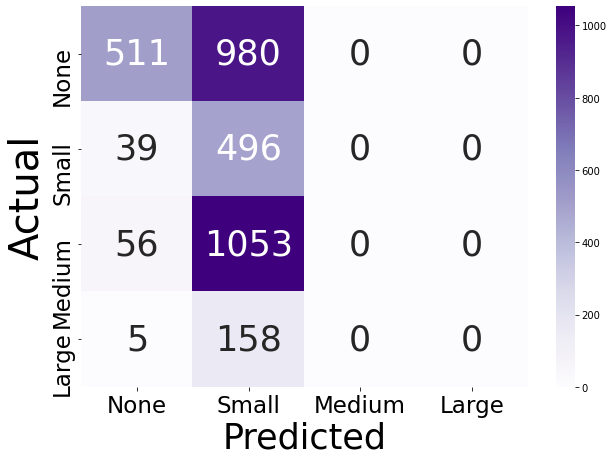

In [46]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
binary = False
if binary:
    df_cm = pd.DataFrame(array, index = [i for i in ["No", "Yes"]],
                    columns = [i for i in ["No", "Yes"]])
else:
    df_cm = pd.DataFrame(array, index = [i for i in ["None", "Small", "Medium", "Large"]],
                  columns = [i for i in ["None", "Small", "Medium", "Large"]])

plt.figure(figsize = (10,7))

ax = sn.heatmap(df_cm, cmap="Purples", annot=True, annot_kws={"size":35}, fmt='g')
ax.tick_params(axis='both', which='major', labelsize=23)
plt.xlabel('Predicted', fontsize = 35) 
# plt.title("KNN Confusion Matrix", fontsize = 50)
plt.ylabel('Actual', fontsize = 40) 
plt.savefig("LSTM Multi Matrix", bbox_inches="tight")

plt.show()

In [20]:
new_d = pd.DataFrame(y)

In [21]:
new_d.value_counts()

0    7502
2    5594
1    2612
3     781
dtype: int64